In [1]:
import json
import nltk
import re
import pandas as pd
import numpy as np

In [2]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 8.1MB/s 


In [3]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [4]:
nltk.download('stopwords')
nltk.download('punkt') # Untuk word_tokenizing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
dataset_berita = pd.read_json("items_detik_news_daily_2.json" ,)
data_berita = pd.DataFrame(dataset_berita)
data_berita

,title,author,date,url,news,_type
0,"Kuras Kartu ATM Perusahaan, Pegawai Kantoran d...",Deden Rahadian - detikNews,"Senin, 06 Apr 2020 21:56 WIB",https://news.detik.com/berita-jawa-barat/d-496...,Seorang karyawan kantor pembiayaan di Kecamata...,dict
1,"Gubernur Khofifah Tak Melarang PSBB, Tapi Ada ...",Faiq Azmi - detikNews,"Senin, 06 Apr 2020 22:05 WIB",https://news.detik.com/berita-jawa-timur/d-496...,Jumlah kasus positif corona d i Jawa Timur ada...,dict
2,Cerita Warga Sukabumi Rumahnya Terendam Banjir...,Syahdan Alamsyah - detikNews,"Senin, 06 Apr 2020 22:08 WIB",https://news.detik.com/berita-jawa-barat/d-496...,"Ukat Sukatma (62) warga Kampung Babakan Anyar,...",dict
3,"Masker Langka, Pemkot Banda Aceh Berdayakan UM...",Yudistira Imandiar - detikNews,"Senin, 06 Apr 2020 22:31 WIB",https://news.detik.com/berita/d-4967651/masker...,Pemerintah Kota (Pemkot) Banda Aceh memberdaya...,dict
4,Wali Kota Semarang Raih Penghargaan Tokoh Pedu...,Yudistira Imandiar - detikNews,"Senin, 06 Apr 2020 22:39 WIB",https://news.detik.com/berita/d-4967655/wali-k...,Wali Kota Semarang Hendrar Prihadi mendapatkan...,dict
...,...,...,...,...,...,...
463,"Pemotor Tewas Misterius di Sleman, Dievakuasi ...",Jauh Hari Wawan S - detikNews,"Senin, 06 Apr 2020 20:18 WIB",https://news.detik.com/berita-jawa-tengah/d-49...,Seorang pengendara sepeda motor bernomor polis...,dict
464,"Sempat Ngantor, Pejabat Pemkot Makassar PDP Co...",Muhammad Nur Abdurrahman - detikNews,"Senin, 06 Apr 2020 21:28 WIB",https://news.detik.com/berita/d-4967628/sempat...,"Pejabat Pemerintah Kota Makassar, Zulkifli Mar...",dict
465,"Meski Pasar Kapasan Ditutup, Pedagang Bisa Amb...",Deny Prastyo Utomo - detikNews,"Senin, 06 Apr 2020 21:02 WIB",https://news.detik.com/berita-jawa-timur/d-496...,Pasar Kapasan ditutup sementara untuk mencegah...,dict
466,Positif Corona Kategori Orang Tanpa Gejala Dip...,Noval Dhwinuari Antony - detikNews,"Senin, 06 Apr 2020 21:15 WIB",https://news.detik.com/berita/d-4967621/positi...,Kepala Dinas Kesehatan Sulsel dr Ichsan Mustar...,dict


In [7]:
Taking_preprocessing = data_berita.iloc[:,[0,4]]
Taking_preprocessing

,title,news
0,"Kuras Kartu ATM Perusahaan, Pegawai Kantoran d...",Seorang karyawan kantor pembiayaan di Kecamata...
1,"Gubernur Khofifah Tak Melarang PSBB, Tapi Ada ...",Jumlah kasus positif corona d i Jawa Timur ada...
2,Cerita Warga Sukabumi Rumahnya Terendam Banjir...,"Ukat Sukatma (62) warga Kampung Babakan Anyar,..."
3,"Masker Langka, Pemkot Banda Aceh Berdayakan UM...",Pemerintah Kota (Pemkot) Banda Aceh memberdaya...
4,Wali Kota Semarang Raih Penghargaan Tokoh Pedu...,Wali Kota Semarang Hendrar Prihadi mendapatkan...
...,...,...
463,"Pemotor Tewas Misterius di Sleman, Dievakuasi ...",Seorang pengendara sepeda motor bernomor polis...
464,"Sempat Ngantor, Pejabat Pemkot Makassar PDP Co...","Pejabat Pemerintah Kota Makassar, Zulkifli Mar..."
465,"Meski Pasar Kapasan Ditutup, Pedagang Bisa Amb...",Pasar Kapasan ditutup sementara untuk mencegah...
466,Positif Corona Kategori Orang Tanpa Gejala Dip...,Kepala Dinas Kesehatan Sulsel dr Ichsan Mustar...


In [8]:
def preprocessing_text(dataset):

    allstopwords = set(stopwords.words("indonesian"))
    indonesia_stemming = StemmerFactory()
    stemming = indonesia_stemming.create_stemmer()

    word = [] # Membuat kalimat baru yang dipreprocessing agar dapat melakukan extraction TF-IDF dengan efektif

    for i in range(len(dataset)):
        preprocessing_text = re.sub("^a-zA-Z0-9" , " " , dataset[i])
        lowering_capital = preprocessing_text.lower()
        tokenizing_become_word = nltk.word_tokenize(lowering_capital)

        review_word = [stemming.stem(word) for word in tokenizing_become_word if word not in allstopwords]
        review_word = " ".join(review_word)
        word.append(review_word)

    return word

In [9]:
#title = preprocessing_text(Taking_preprocessing["title"])
news = preprocessing_text(Taking_preprocessing["news"]) # (Butuh running time sekitar 10 menitan)

In [10]:
title = preprocessing_text(Taking_preprocessing["title"]) # (Butuh running time sekitar 1 menitan)

In [11]:
news

['karyawan kantor biaya camat singaparna  tasikmalaya uras uang kartu atm milik usaha  laku nekat lilit utang pinjam online  tanggung  laku warga bandung uras kartu atm usaha  duit rp 10 juta ambil laku atm usaha   jadi kamis 19 maret laku curi  salah karyawan bersih bersih loker kunci  temu buah atm nomor pin nya  laku utang tarik tunai atm rp 10 juta   akp siswo tarigan  kasat reskrim polres tasikmalaya  senin  06 4 2020   hadap polisi  laku aku utang rp 10 juta pinjam online  laku gelap mata honor usaha cukup   laku utang pintek pinjam online puluh juta nutup utang nyuri  siswo  polisi aman barang bukti buah kartu atm  stel pakai  unit handphone hasil beli uang hasil curi  sangka kena pasal 362 curi ancam hukum penjara   kena pasal 362 curi maksimal hukum  pungkas siswo ',
 'positif corona d i jawa timur 189 sebar 24 kabupaten kota   wilayah jatim terap batas sosial skala  psbb    cek sekda  wilayah aju psbb  aju bahas  kota malang aju psbb konfirmasi    gubernur jawa timur khofifah

In [12]:
## Cara feature extraction untuk melakukan TF-IDF ( gabungan 2 library feature_extraction yaitu CountVectorizer dan TF-IDFTransformer )
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

tf_idf = TfidfVectorizer(max_df = 20)
document = tf_idf.fit_transform(news)
print(tf_idf.get_feature_names())

random_select = random.randint(0,len(news))
print(random_select)
similarity_value = [] 

## Hasil Eksperimen dengan Document dengan Jumlah Cluster = 150
# 1. Jika mengambil Document di bagian 279 mendapat accuracy 100 %
# 2. Jika mengambil Document di bagian 229 mendapat accuracy 100 %
# 3. Jika mengambil Document di bagian 385 mendapat accuracy 100 %

for n in range(len(news)):
    text_similarity = cosine_similarity(document[random_select:random_select+1] , document[n])
    similarity_value.append(text_similarity)
len(similarity_value)

['003', '005', '008', '01', '0103', '013', '0184', '02', '0219', '027', '03', '031', '04', '047', '048', '05', '050', '055h', '06', '0604', '067', '07', '072', '074', '075', '078', '08', '080', '08112851199', '081133399000', '082', '0823', '083', '089', '09', '096', '098', '1000', '1001', '101', '102', '103', '104', '105', '106', '107', '109', '110', '1100', '1101', '1102', '111', '112', '113', '114', '115', '1169', '117', '1170', '118', '119', '120', '121', '122', '1220', '124', '1245546299002204161', '125', '126', '127', '129', '12a', '130', '131', '132', '135', '136', '137', '138', '139', '140', '141', '1441', '145', '148', '150', '1500060', '1500567', '152', '154', '155', '156', '158', '159', '160', '162', '164', '165', '167', '169', '172', '173', '175', '176', '178', '179', '1790', '180', '181', '182', '183', '185', '186', '187', '188', '189', '1890', '191', '192', '193', '1945', '1954', '196', '1960', '197', '198', '1981', '1984', '1985', '1989', '199', '1990', '1995', '1997', '1

468

In [13]:
similarity = np.array(similarity_value)
similarity = similarity.reshape(len(similarity) , 1) # Hasil numpy nya (468,1,1) maka digunakan reshape untuk dibuat 2 dimensi

In [14]:
data_similarity = pd.DataFrame(similarity , columns = ["Similarity Value"])
data_Similarity_forcluster = Taking_preprocessing.join(data_similarity)
data_Similarity_forcluster

,title,news,Similarity Value
0,"Kuras Kartu ATM Perusahaan, Pegawai Kantoran d...",Seorang karyawan kantor pembiayaan di Kecamata...,0.000000
1,"Gubernur Khofifah Tak Melarang PSBB, Tapi Ada ...",Jumlah kasus positif corona d i Jawa Timur ada...,0.000000
2,Cerita Warga Sukabumi Rumahnya Terendam Banjir...,"Ukat Sukatma (62) warga Kampung Babakan Anyar,...",0.012674
3,"Masker Langka, Pemkot Banda Aceh Berdayakan UM...",Pemerintah Kota (Pemkot) Banda Aceh memberdaya...,0.000000
4,Wali Kota Semarang Raih Penghargaan Tokoh Pedu...,Wali Kota Semarang Hendrar Prihadi mendapatkan...,0.006042
...,...,...,...
463,"Pemotor Tewas Misterius di Sleman, Dievakuasi ...",Seorang pengendara sepeda motor bernomor polis...,0.000000
464,"Sempat Ngantor, Pejabat Pemkot Makassar PDP Co...","Pejabat Pemerintah Kota Makassar, Zulkifli Mar...",0.081419
465,"Meski Pasar Kapasan Ditutup, Pedagang Bisa Amb...",Pasar Kapasan ditutup sementara untuk mencegah...,0.000000
466,Positif Corona Kategori Orang Tanpa Gejala Dip...,Kepala Dinas Kesehatan Sulsel dr Ichsan Mustar...,0.000000


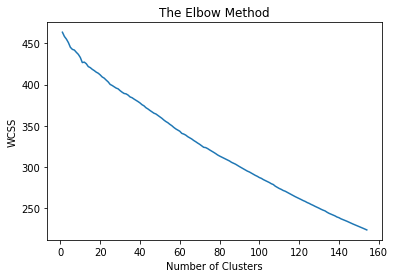

In [16]:
from sklearn.cluster import KMeans # Butuh running time sekitar 8-9 menitan
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score, silhouette_score

ranging_left = 1
ranging_right = 155

wcss = []
for i in range(ranging_left,ranging_right):
    k_means = KMeans(n_clusters=i , init = "k-means++" , random_state = 0)
    k_means.fit(document)
    wcss.append(k_means.inertia_)

plt.plot(range(ranging_left,ranging_right) , wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
k = 150

kmeans = KMeans(n_clusters = k , init = "k-means++" , random_state = 0)
Y_pred = kmeans.fit_predict(document)
Y_pred

array([ 48,  15,  21,  62,  92,  35,  28,  63, 140,   9, 120,  24, 124,
        53, 101,  36,  71, 147,  63, 147,  26, 100,  18,  44,  63,  13,
       101,  87,  54,  91,  62,  27,  63,   5, 101, 105,  21,   9,  92,
        33, 105,  27,  18, 140, 137,   2,   4,  85,  23,  38,  73,  34,
        76,   4,  60,  15,  69,  10,  90,  20, 134, 100,  33, 144, 149,
        16,  49,  64,   1,  87,  64, 125, 112,  68, 101, 141,  12,  53,
         3,   7,  32,  98,  13,   4,  94,  56,  87,  28,  86,  58,  80,
        21,  99, 122,  57,  92,  96,  86,  34,  25,  50,  36, 125,  84,
        86,  32,  26,  10, 103,  64, 140, 100,  89,   2,  49,  67,  25,
        30, 142,  93,  89,  47,   9,   9,  59,  55, 128, 111,  34,  17,
        46,  14,  45,  65,  40,   9,   7,   5,  16,  74,  11,  58,   0,
        55, 120,  74,  62,  52,  71, 116, 143,  30,   9,  91,   6, 106,
        61, 123,   9,   5,  37, 142,  52,  74,   6,  23, 127,  98,  95,
        65,   5, 108, 148,   5, 146,  41,  30,  69,  11,  35, 12

In [18]:
Y = pd.DataFrame(Y_pred , columns = ["Topic Clustering"])
Document_for_Similarity = data_Similarity_forcluster.join(Y)
Document_for_Similarity

,title,news,Similarity Value,Topic Clustering
0,"Kuras Kartu ATM Perusahaan, Pegawai Kantoran d...",Seorang karyawan kantor pembiayaan di Kecamata...,0.000000,48
1,"Gubernur Khofifah Tak Melarang PSBB, Tapi Ada ...",Jumlah kasus positif corona d i Jawa Timur ada...,0.000000,15
2,Cerita Warga Sukabumi Rumahnya Terendam Banjir...,"Ukat Sukatma (62) warga Kampung Babakan Anyar,...",0.012674,21
3,"Masker Langka, Pemkot Banda Aceh Berdayakan UM...",Pemerintah Kota (Pemkot) Banda Aceh memberdaya...,0.000000,62
4,Wali Kota Semarang Raih Penghargaan Tokoh Pedu...,Wali Kota Semarang Hendrar Prihadi mendapatkan...,0.006042,92
...,...,...,...,...
463,"Pemotor Tewas Misterius di Sleman, Dievakuasi ...",Seorang pengendara sepeda motor bernomor polis...,0.000000,94
464,"Sempat Ngantor, Pejabat Pemkot Makassar PDP Co...","Pejabat Pemerintah Kota Makassar, Zulkifli Mar...",0.081419,24
465,"Meski Pasar Kapasan Ditutup, Pedagang Bisa Amb...",Pasar Kapasan ditutup sementara untuk mencegah...,0.000000,45
466,Positif Corona Kategori Orang Tanpa Gejala Dip...,Kepala Dinas Kesehatan Sulsel dr Ichsan Mustar...,0.000000,27


In [19]:
Document_for_Similarity = Document_for_Similarity.sort_values(by=["Topic Clustering" , "news"])
Document_for_Similarity.head(5)

,title,news,Similarity Value,Topic Clustering
142,Ini Tips Menggunakan Masker Kain Menurut Pakar...,Penggunaan masker menjadi salah satu alternati...,0.000000,0
388,"Sosialisasikan Pencegahan Corona, Polisi Banyu...",Sosialisasi penggunaan masker untuk pencegahan...,0.000000,0
432,Pemkab Banyuwangi Wajibkan Warga yang Keluar R...,Warga Banyuwangi wajib memakai masker. Kewajib...,0.007525,0
207,"Perkosa-Bunuh Siswi SMP, Pelatih Pramuka di Su...","Polisi menangkap AS (19), pelatih pramuka yang...",0.015739,1
391,Polisi Tetapkan Pembina Pramuka Pemerkosa-Pemb...,Polisi menetapkan pembina Pramuka berinisial A...,0.000000,1


In [20]:
for l in range(k):
    news_topic = Document_for_Similarity[Document_for_Similarity["Topic Clustering"] == l]["title"].values.tolist()
    print("Topic : " + str(l+1))
    print("List Title News Topic " + str(l+1) + " : " , news_topic)
    print("")

Topic : 1
List Title News Topic 1 :  ['Ini Tips Menggunakan Masker Kain Menurut Pakar Kesehatan dari Unpad', 'Sosialisasikan Pencegahan Corona, Polisi Banyuwangi Bagi Masker dan Sembako', 'Pemkab Banyuwangi Wajibkan Warga yang Keluar Rumah Pakai Masker']

Topic : 2
List Title News Topic 2 :  ['Perkosa-Bunuh Siswi SMP, Pelatih Pramuka di Sumsel Berdalih Memendam Asmara', 'Polisi Tetapkan Pembina Pramuka Pemerkosa-Pembunuh Siswi SMP Jadi Tersangka', 'Keji! Pembina Pramuka Kembali Memperkosa Usai Siswi SMP Tewas Dicekik', 'Ini Tampang Pembina Pramuka Tersangka Pemerkosa-Pembunuh Siswi di Sumsel', 'Polisi Ungkap Alasan Pembina Pramuka Tusuk Pipi-Tubuh Siswi yang Diperkosa', 'Siswi SMP Tewas di Hutan Sumsel, Diduga Diperkosa Lalu Dibunuh', 'Sadis! Pembina Pramuka Tusuk Pipi-Tubuh Siswi SMP yang Tewas Diperkosa', 'Siswi SMP Diperkosa-Dibunuh di Sumsel, Polisi: Pelakunya Pembina Pramuka']

Topic : 3
List Title News Topic 3 :  ['BPJAMSOSTEK Gaet Pengusaha Warteg Sediakan Makan Gratis untuk Ojo

In [22]:
# Untuk Mencari topik Cluster untuk bagian yang random bisa menggunakan metode ini
find_topic_cluster = Document_for_Similarity[Document_for_Similarity.index == random_select]
find_topic_cluster

,title,news,Similarity Value,Topic Clustering
196,"Viral Warga Bawa Jenazah Naik Taksi, RS: Takut...",Beredar sebuah video viral di masyarakat yang ...,1.0,117


In [24]:
Select_topic_cluster = Document_for_Similarity.loc[random_select,"Topic Clustering"]
Check_similarity_topic = Document_for_Similarity[Document_for_Similarity["Topic Clustering"] == Select_topic_cluster]
print(len(Check_similarity_topic))
Check_similarity_topic

2


,title,news,Similarity Value,Topic Clustering
196,"Viral Warga Bawa Jenazah Naik Taksi, RS: Takut...",Beredar sebuah video viral di masyarakat yang ...,1.000000,117
387,"Salut, Remaja Ini Produksi Face Shield yang Di...",Saat ini Alat Pelindung Diri (APD) sangat dibu...,0.114155,117


In [25]:
check_highest_similarity_document = Check_similarity_topic.sort_values(by = ["Similarity Value"] , ascending=False)
check_highest_similarity_document.head(5)

,title,news,Similarity Value,Topic Clustering
196,"Viral Warga Bawa Jenazah Naik Taksi, RS: Takut...",Beredar sebuah video viral di masyarakat yang ...,1.000000,117
387,"Salut, Remaja Ini Produksi Face Shield yang Di...",Saat ini Alat Pelindung Diri (APD) sangat dibu...,0.114155,117


In [26]:
Document_forpattern = pd.DataFrame(check_highest_similarity_document["news"].tolist() , columns = ["news"])
Preprocessing_forpattern = Document_forpattern.values.tolist()
Preprocessing_forpattern

[['Beredar sebuah video viral di masyarakat yang memperlihatkan jenazah yang dibawa pulang dari RS Syekh Yusuf Gowa menggunakan taksi online. Versi pihak rumah sakit, pihak keluarga jenazah menolak menggunakan ambulans bekas pakai pasien Covid-19. Dalam video viral yang beredar, Senin (6/4/2020), terlihat jenazah itu diangkut dengan taksi online meski ada sebuah ambulans rumah sakit yang terparkir di halaman rumah sakit. "Jadi kejadiannya kemarin itu orang sudah meninggal, agak sorean. Terus dia mau dibawa pulang ke rumahnya dari rumah sakit Syekh Yusuf," kata Kepala Dinas Informasi Gowa, Arifuddin Saeni, kepada detikcom. Pihak rumah sakit, kata Arifuddin, telah menawarkan ambulans yang lowong di sana. Namun memang pihak rumah sakit mengatakan bahwa ambulans itu pernah mengangkut jenazah pasien Covid-19. "Tapi sudah sterilkan, sudah bisa dipakai dan sudah dibersihkan. Tapi keluarganya tidak mau karena takut," ucapnya. Setelah penolakan itu, pihak rumah sakit menawarkan untuk menggunaka

In [27]:
Pattern_SelectDocument = ''

select_document = Preprocessing_forpattern[0]
Pattern_SelectDocument = "".join(select_document).split()

list_pattern_word = []
number = []

for r in range(len(Preprocessing_forpattern)):
    spliting_word = ''
    pivot = Preprocessing_forpattern[r]
    spliting_word = "".join(pivot).split()

    per_indexing_word = []
    if r == 0:
        per_indexing_word.append("-")
    if r > 0:
        for s in spliting_word:
            if s in Pattern_SelectDocument and s not in per_indexing_word:
                per_indexing_word.append(s)
            if len(per_indexing_word) == 10 and r > 0:
                break

    Combining = " ".join(per_indexing_word)
    Combining = Combining.replace(" " , " , ")
    
    number.append(r)
    list_pattern_word.append(Combining)

In [28]:
list_pattern_word

['-',
 'ini , untuk , pasien , Namun , dan , di , yang , menggunakan , sudah , telah']

In [29]:
Word_listpattern = pd.DataFrame(np.array(list_pattern_word , dtype="object") , columns = ["Word List Found Pattern"])
Check_highest_Sim = check_highest_similarity_document.reset_index(drop=True)
Document_ListSimilarity = Check_highest_Sim.join(Word_listpattern)
Document_ListSimilarity.head(5)

,title,news,Similarity Value,Topic Clustering,Word List Found Pattern
0,"Viral Warga Bawa Jenazah Naik Taksi, RS: Takut...",Beredar sebuah video viral di masyarakat yang ...,1.000000,117,-
1,"Salut, Remaja Ini Produksi Face Shield yang Di...",Saat ini Alat Pelindung Diri (APD) sangat dibu...,0.114155,117,"ini , untuk , pasien , Namun , dan , di , yang..."


In [30]:
Correct_Predict = []
Didnt_match = [] 

for s in range(len(Check_similarity_topic)):
    if check_highest_similarity_document.iloc[s,2] == 0.0: # Jika hasil nya 0.0 maka tidak ada satu pun kata yang mirip
        Didnt_match.append("Didn't find any word match")
    else:
        Correct_Predict.append("Find any word match with other news")

In [31]:
Accuracy_score = (len(Correct_Predict)/len(Check_similarity_topic)) * 100 # Hasil model Accuracy Kemiripan berita
Accuracy_score

100.0

In [32]:
number_data = []
listplot_value = []

for p in range(len(Check_similarity_topic)):
    number_data.append(p+1)
    listplot_value.append(Check_similarity_topic.iloc[p,2])

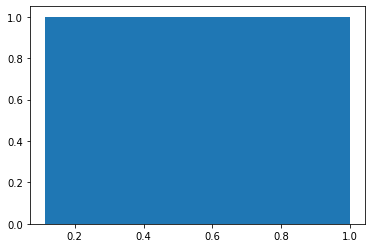

In [33]:
plt.hist(listplot_value , len(listplot_value))
plt.show()